## Table of Content

* [Introduction](#Intro)
* [Data Overview](#DataOverview)
* [Libraries](#Libraries)
* [Metadata Exploration](#MetaExplore)
* [Data Visualization and Cleaning](#DataClean)
* [Data Exploration, Question, and Answers](#Dataexplore)
* [Questions](#Questions)
* [Exploration](#Explore)
* [Answers](#Answers)
* [Proposed Further Research](#WhatFurther)







<a id='Intro'></a>
# <center> Global Surface Water Transitional Changes</center>

## <center>Introduction</center>
<p style="font-family:times">
    
Global surface water is the most accessible water source for primary use and consumption by humans. Environmental and anthropogenic disturbances are reshaping the world’s water distribution; semi-arid to arid regions are facing imminent surface water scarcity and are increasingly more dependant on finding access to ground water.

Fluctuation of surface water, such as permanent water loss or land being permanently covered by water where never before, can have devastating effects on climate, ecological niches, and human wellbeing. Having access to a global surface water dataset with high temporal and medium spatial resolution is key to continue learning, monitoring , and planing for the future.

The European Commission’s Join Research Center developed a global surface water app , it allows access to data, background information, and data exploration tools. The 2016 Nature publication that thorougly analyzed this dataset (cited below), inspired me to dive in and further explore the topic of “Water Availability”, to name it hollisticaly.

App: https://global-surface-water.appspot.com/#
Paper : https://www.nature.com/articles/nature20584.epdf?author_access_token=C5JSvooRop4jWxyp_qRPLNRgN0jAjWel9jnR3ZoTv0MqBuzCNsmw_DFxRd7sX93nfPzcbm_xTiPLlZMl7XrUhadm6EiT9cGdDNgn1s6EWrPWH3IeadLUjApplBoaS6xH
Paper citation : Paper: Jean-Francois Pekel, Andrew Cottam, Noel Gorelick, Alan S. Belward, High-resolution mapping of global surface water and its long-term changes. Nature 540, 418-422 (2016). (doi:10.1038/nature20584)
</p>

<a id='DataOverview'></a>
## <center>Data Overview</center>
<p style="font-family:times">
    
The Global Surface Water is an open source dataset made available by the Copernicus Programme. Derived through remote sensing by the Landsat satellites, these raster files have a 30m resolution, and emcompass a data collection of 32 years, 1984-2015. The data is available here https://global-surface-water.appspot.com/download, as a world wide 10 degree grid as as a TIFF file format, used for raster (pixel base) data. 

The dataset maps different stages of surface water such as ocurrence, change, seasonality, recurrence, transition and maximum extent. Due to time constraints, in this exploratory analysis I only looked at Transition. Transition represents the change observed in the last two years of data collection compared to what the water values were the first time they were collected. This data does not tell what happened in the time in between, but referring back to the methodology on how these values are calculated, a lot of care was put into making sure values of transition that happened by chance were not reported. 

I chose this dataset aiming to identify where potentially major and long term changes might be occurring. As an analyst, I try to identify overall trends, places of interest, and use this information to further narrow down my research. The Transition data categorizes the water changes into ten values, each data variable provides different information and they all will be explored throughout this analysis.In adition, I randomly chose four Areas of Interest (AOIs) from different parts of the world: Lake Mead, Lake Hamun, Alpine Lakes, and Tibetan Lakes.

</p>

<a id='Libraries'></a>
## <center>Libraries</center>
Satellite image processing using Python!


In [1]:
# Read imagery 
import os
from osgeo import gdal
import rasterio as rio

# Visualize
import geopandas as gpd
from rasterio import plot
from rasterio.plot import show
import matplotlib.pyplot as plt
#from IPython.display import HTML, display
#import tabulate
%matplotlib inline

# Stats and Analysis
import numpy as np
import pandas as pd
from scipy import stats



<a id='MetaExplore'></a>
## <center>Metadata Exploration</center>

Open raster files with Rasterio to access its metadata. The metadata provides information about the properties of the files used at different stages of the manipulation and analysis. Rasterio is python based and a GDAL wraper, commonly used for processing raster files from different formats such as TIFF, GeoTIFF, among some.


In [4]:
# Open imagery with rasterio

LakesTibet = rio.open("/Users/nataliaagudelo/Desktop/Capstone1/DataSet/transitions_HighElevLakesTibet_80E_40N.tif")
LakeHamoun = rio.open ("/Users/nataliaagudelo/Desktop/Capstone1/DataSet/transitions_LakeHamoun_60E_40N.tif")
AlpineLakes = rio.open ("/Users/nataliaagudelo/Desktop/Capstone1/DataSet/transitions_AlpenineLakes_b_0E_50N.tif")
LakeMead = rio.open ("/Users/nataliaagudelo/Desktop/Capstone1/DataSet/transitions_LakeMead_120W_40N.tif")

In [5]:
# raster variable is either a rasterio._io.RasterReader 
# Or numpy.ndarray, depends on the file was open and read
type(LakesTibet)

rasterio.io.DatasetReader

In [6]:
# Number of bands (input any of the images)
LakesTibet.count

1

In [7]:
# get number of rows and columns (input any of the images)
LakesTibet.shape

(40000, 40000)

In [8]:
# Check for the bit integer values of each pixel
# Some times the bit number influences the data stats
LakesTibet.dtypes

('uint8',)

In [9]:
# Bound of the file
LakesTibet.bounds

BoundingBox(left=80.0, bottom=30.0, right=90.0, top=40.0)

In [10]:
# bounding box fundamental attribute
# The product of this matrix and (0, 0), is the spatial position of the upper left corner
# The product of this matrix and (width, height), is the lower right corner
LakesTibet.transform

Affine(0.00025, 0.0, 80.0,
       0.0, -0.00025, 40.0)

In [11]:
# Look up the projection
LakesTibet.crs

CRS.from_dict(init='epsg:4326')

In [12]:
# Data format
LakesTibet.driver

'GTiff'

In [13]:
# No data Values show or read as
# Crucial for file manipulation and stats, sometimes reads as Nan or zeros
LakesTibet.nodatavals

(None,)

In [14]:
# Metadata for the file
LakesTibet.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 40000,
 'height': 40000,
 'count': 1,
 'crs': CRS.from_dict(init='epsg:4326'),
 'transform': Affine(0.00025, 0.0, 80.0,
        0.0, -0.00025, 40.0)}

In [15]:
LakesTibet.mode

'r'

In [16]:
LakesTibet.closed

False

<a id='DataClean'></a>

## <center>Data Visualization and Cleaning</center>

<p style="font-family:times">
    
As observed in the metadata, the original files are in a rasterio dataread format, with dimensions of 40000*40000 pixels, and the nonvalues pixels read as None. Read the rasters with Rasterio to convert them into a 2D Numpy array for manipulation. Each pixel can be thought of as an equivalent to a cell in a spreadsheet.
</p>
    
<p style="font-family:times">
    
The AOIs areas, Lake Mead, Lake Hamoun, Alpine Lakes, and Tibetan Lakes, are very small compare to the original data size. Therefore, its necessary to zoom in into each lake to visualize them, and mute pixels with zero and nonvalues in order to run statistics. 
</p>    
    
<p style="font-family:times">
    
As previously stated, the Transitional data values are discrete and range from 1-10 as observed in the table below. They indicate, unchanging permanent water surfaces;  new permanent water surfaces (conversion of land into permanent water); lost permanent water surfaces (conversion of permanent water into land); unchanging seasonal water surfaces; new seasonal water surfaces (conversion of land into seasonal water); lost seasonal water surfaces (conversion of a seasonal water into land); conversion of permanent water into seasonal water; and the conversion of seasonal water into permanent water.

An important note to keep in mind is that the No Water values, zero,  do not indicate water loss, they indicate pixels over land that never represented water throughout this study.
</p>

<center>The Transitions Dataset Legend</center>

| Symbology |    |
|------|------|
|   No Water: 0
    Permanent:	 1
    New permanent:	 2
    Lost permanent:	 3
    Seasonal:	     4
    New seasonal:	 5
    Lost seasonal:	 6
    Seasonal to permanent:	7
    Permanent to seasonal:	8
    Ephemeral permanent:	9
    Ephemeral seasonal:	10
    No data: 255


In [17]:
# Open imagery to convert into a numpy array, visualize and manipulate.
with rio.open("/Users/nataliaagudelo/Desktop/Capstone1/DataSet/transitions_HighElevLakesTibet_80E_40N.tif") as LakesTibet:
    LakesTibet_data = LakesTibet.read(1)   
with rio.open ("/Users/nataliaagudelo/Desktop/Capstone1/DataSet/transitions_LakeHamoun_60E_40N.tif") as LakeHamoun:
    LakeHamoun_data = LakeHamoun.read(1)   
with rio.open ("/Users/nataliaagudelo/Desktop/Capstone1/DataSet/transitions_AlpenineLakes_b_0E_50N.tif") as AlpineLakes:
    AlpineLakes_data = AlpineLakes.read(1)   
with rio.open ("/Users/nataliaagudelo/Desktop/Capstone1/DataSet/transitions_LakeMead_120W_40N.tif") as LakeMead:
    LakeMead_data = LakeMead.read(1)

In [19]:
# Data converted to an numpy array
type(LakesTibet_data)

numpy.ndarray

The original data is from a 10 degree grid cell, the high amount of pixels with zero and nonvalues<br> make the areas of interest very difficult to visualize, as seen bellow.<br>
The Alpine lakes chosen for this study are located on the East Center of the original dataset.<br>
Lake Hamoun is at the South West corner<br>
Lame Mead is right at the center of the image<br>
And the Alpine Lakes are a series of small bodies of water disperse througout almost the entire original image


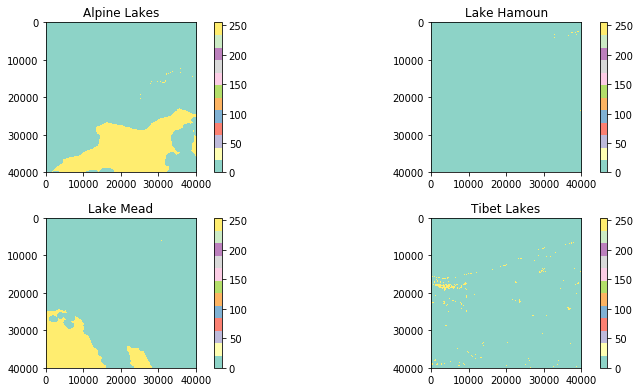

In [23]:
# Set figure size
fig = plt.subplots(2,2, figsize=(22,16))


# Position, title & plot of each band
plt.subplot(221), plt.imshow(AlpineLakes_data, cmap='Set3'),plt.title("Alpine Lakes"),plt.colorbar()
plt.subplot(222), plt.imshow(LakeHamoun_data,cmap='Set3'), plt.title("Lake Hamoun"), plt.colorbar()
plt.subplot(223), plt.imshow(LakeMead_data, cmap='Set3'), plt.title("Lake Mead"),plt.colorbar()
plt.subplot(224), plt.imshow(LakesTibet_data, cmap='Set3'), plt.title("Tibet Lakes"), plt.colorbar()
plt.subplots_adjust(bottom=0.6, right=0.6, top=0.9, wspace = 0.05, hspace = 0.3)

plt.show()


In order to zoom in into each lake the following is needed:
Need to convert the datatype from unit8 to float32<br>
Need to change  the no-data values of "0" to NaN<br>
Be aware the array with NaNs will take 2x the storage space 



In [24]:
# convert the datatype from uint16 to float32
# Change no-data value set to "0" to NaN
LakesTibet_data = LakesTibet_data.astype('f4')
LakesTibet_data[LakesTibet_data==0] = np.nan
LakeHamoun_data = LakeHamoun_data.astype('f4')
LakeHamoun_data[LakeHamoun_data==0] = np.nan
AlpineLakes_data = AlpineLakes_data.astype('f4')
AlpineLakes_data[AlpineLakes_data==0] = np.nan
LakeMead_data = LakeMead_data.astype('f4')
LakeMead_data[LakeMead_data==0] = np.nan
    

In [25]:
type(LakesTibet_data)

numpy.ndarray


Slicing original data into areas of interest<br>
The arguments take the Y axis values first, followed by the X axis values, [Ymax:Ymin, Xmin:Xmax]<br>


In [27]:
# Slice data original dataset [Ymax:Ymin, Xmin:Xmax]
LakesTibet_data = LakesTibet_data[15000:40000, 0:40000]
LakeHamoun_data = LakeHamoun_data[33500:38500, 3800:8500]
AlpineLakes_data = AlpineLakes_data[15000:17000, 33200:38000]
LakeMead_data = LakeMead_data[13800:16000, 20500:25000]


In [29]:
# Zero values replaced by nan
LakeMead_data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)


Finally, lets take a look at the lakes!


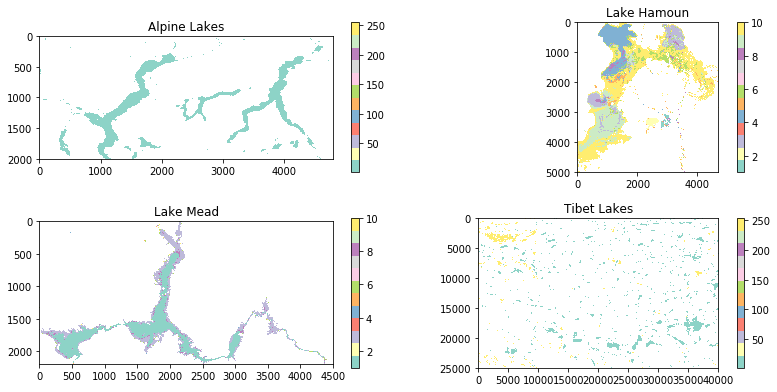

In [26]:
# Set figure size
fig = plt.subplots(2,2, figsize=(22,16))

# Position, title & plot of each band
plt.subplot(221), plt.imshow(AlpineLakes_data, cmap='Set3'),plt.title("Alpine Lakes"),plt.colorbar()
plt.subplot(222), plt.imshow(LakeHamoun_data,cmap='Set3'), plt.title("Lake Hamoun"), plt.colorbar()
plt.subplot(223), plt.imshow(LakeMead_data, cmap='Set3'), plt.title("Lake Mead"),plt.colorbar()
plt.subplot(224), plt.imshow(LakesTibet_data, cmap='Set3'), plt.title("Tibet Lakes"), plt.colorbar()
plt.subplots_adjust(bottom=0.6, right=0.6, top=0.9, wspace = 0.05, hspace = 0.3)
plt.show()

In [30]:
LakesTibet_data

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

Lets take our zeros back and convert the data into integers<br>
to facilitate running some statistics.

In [31]:
# Replace NaN with zero and infinity with large finite numbers.
# Undo the all "0" into NaN values used previously
LakesTibet_data = np.nan_to_num(LakesTibet_data)
LakeHamoun_data = np.nan_to_num(LakeHamoun_data)
AlpineLakes_data = np.nan_to_num(AlpineLakes_data)
LakeMead_data = np.nan_to_num(LakeMead_data)

In [32]:
# convert floats into int
LakesTibet_data = LakesTibet_data.astype(int)
LakeHamoun_data = LakeHamoun_data.astype(int)
AlpineLakes_data = AlpineLakes_data.astype(int)
LakeMead_data = LakeMead_data.astype(int)

LakesTibet_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Continue cleaning the data in order to run statistics on pixel's values that depict only water.<br>
Lets get rid of zeros which in this case indicate land and pixels with no data values, 255. <br>

Be aware that keeping or leaving zeros as part of your data depends on the dataset and the question. 

In [34]:
# Get rid of zeros, needed in our case.
LakesTibet_nozeros = LakesTibet_data[LakesTibet_data != 0]
LakeHamoun_nozeros = LakeHamoun_data[LakeHamoun_data != 0]
AlpineLakes_nozeros = AlpineLakes_data[AlpineLakes_data != 0]
LakeMead_nozeros = LakeMead_data[LakeMead_data != 0]

In [35]:
print (AlpineLakes_nozeros.min())
print (AlpineLakes_nozeros.max())

1
255


In [36]:
# Get ride of pixels with no values
LakesTibet_final = LakesTibet_nozeros[LakesTibet_nozeros != 255]
LakeHamoun_final = LakeHamoun_nozeros[LakeHamoun_nozeros != 255]
AlpineLakes_final = AlpineLakes_nozeros[AlpineLakes_nozeros != 255]
LakeMead_final = LakeMead_nozeros[LakeMead_nozeros != 255]


In [37]:
print(AlpineLakes_final.min())
print(AlpineLakes_final.max())

1
10


In [45]:
# Dataset composed of pixels with only water data
subset_lakes = LakesTibet_final, LakeHamoun_final, AlpineLakes_final, LakeMead_final
subset_lakes

(array([6, 6, 6, ..., 5, 4, 4]),
 array([ 5,  5,  5, ..., 10, 10,  5]),
 array([6, 6, 4, ..., 1, 1, 6]),
 array([6, 6, 6, ..., 1, 1, 1]))

<a id='Dataexplore'></a>
## <center>Data Exploration, Questions, and Answers</center>

<a id='Questions'></a>


### <center>Questions</center>


<p style="font-family:times">
    
Where is water running out? and Where is water not running out? are questions that I personally come across often as analyst. Although, they initially might seem simplistic compared to the complexity of the topic regarding water, they make sense at an initial stage of research when an individual is trying to get an overall idea of where there might be obvious signs of trouble or resilience.
    
Since it is my first time looking at this Surface Water dataset, I will follow the logic above and I will attempt to gain an overall insight regarding the current state of surface water compared to 32 years ago. Therefore, I would initially like to find out the following:


1. Which AOI had the highest gain of water?<br />
2. Which AOI had the highest loss of water?<br />
3. Which AOIs had the highest and lowest transitional variation?


With a clean dataset on hand in which all values represent only water, and the questions above in mind, I will explore the descriptive values, the central tendencies, and the distribution of the data. Keep in mind we are dealing with discrete values from 1-10.



<a id='Explore'></a>
### <center>Exploration</center>


Firsts look at the distribution of the raw data for each AOI.

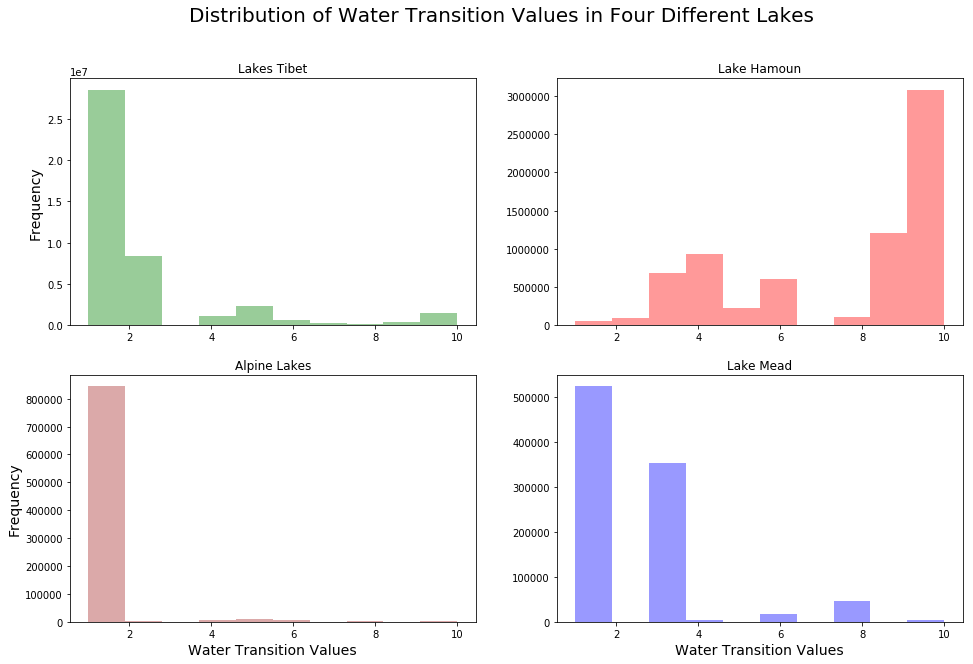

In [23]:
# Set figure size
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(16,10))


# Names for the whole graph
plt.suptitle("Distribution of Water Transition Values in Four Different Lakes", fontsize=20)

# Position, title & plot of each band
ax1 = plt.subplot(221), plt.hist(LakesTibet_final, alpha=0.4, color='green'),plt.title("Lakes Tibet"), plt.ylabel("Frequency", fontsize=14)
ax2 = plt.subplot(222), plt.hist(LakeHamoun_final, alpha=0.4, color='red'), plt.title("Lake Hamoun")
ax3 = plt.subplot(223), plt.hist(AlpineLakes_final, alpha=0.4, color='brown'), plt.title("Alpine Lakes"), plt.ylabel("Frequency", fontsize=14), plt.xlabel("Water Transition Values", fontsize=14)
ax4 = plt.subplot(224), plt.hist(LakeMead_final, alpha=0.4, color='blue'), plt.title("Lake Mead"), plt.xlabel("Water Transition Values", fontsize=14)

plt.show()

The data above shows a skewness of most of the lakes toward the left, representing value 1, which indicates unchanged permanent water. The Tibet's Lakes with the most pixels under that value, followed by the Alpine Lakes, and Leak Mead. Lake Hamoun showing a tendency towards the opposite side of the distribution by having most pixels with values 10, representing a transition into ephemeral seasonal waters. 

Having the exact number of pixels under each transition value would help getting an even clearer picture.

In [78]:
# Get a unique count for each  transition value
TibetLakes = np.array(np.unique(LakesTibet_final, return_counts=True)).T
LakeHamoun = np.array(np.unique(LakeHamoun_final, return_counts=True)).T
AlpineLakes = np.array(np.unique(AlpineLakes_final, return_counts=True)).T
LakeMead = np.array(np.unique(LakeMead_final, return_counts=True)).T

LakeMead

array([[     1, 524044],
       [     2,     99],
       [     3, 354712],
       [     4,   2983],
       [     5,    573],
       [     6,  16668],
       [     7,     33],
       [     8,  47012],
       [     9,    113],
       [    10,   3215]])

Place the previous calculations into a data frame for better manipulation and visualization.

In [53]:
# Create data frame from the data above
Variable = "Permanent", 
Tibet = pd.DataFrame(TibetLakes, columns=['Variable','Count'])
Tibet["Area"]=["Tibet"]*10
Hamoun = pd.DataFrame(LakeHamoun, columns=['Variable','Count' ])
Hamoun["Area"]=["Hamoun"]*10
Alpines = pd.DataFrame(AlpineLakes, columns=['Variable','Count' ])
Alpines["Area"]=["Alpines"]*10
Mead = pd.DataFrame(LakeMead, columns=['Variable','Count' ])
Mead["Area"]=["Mead"]*10
count_table = pd.concat([Tibet, Hamoun, Alpines, Mead], ignore_index=True)
count_table = count_table[["Area", "Variable", "Count"]]

print(count_table.head())
print(count_table.tail())


    Area  Variable     Count
0  Tibet         1  28504243
1  Tibet         2   8373159
2  Tibet         3     95156
3  Tibet         4   1114056
4  Tibet         5   2375523
    Area  Variable  Count
35  Mead         6  16668
36  Mead         7     33
37  Mead         8  47012
38  Mead         9    113
39  Mead        10   3215


Create pivot table for easier plotting of all individual areas and respective transition values

In [79]:
# Create pivot table for easier ploting of all individual areas and respective transition values
count1 = count_table.pivot(index='Area', columns='Variable', values='Count')
count1


Variable,1,2,3,4,5,6,7,8,9,10
Area,,,,,,,,,,
Alpines,843675,2841,635,8009,9539,5828,316,1953,126,2122
Hamoun,55550,101399,688231,932941,231244,603288,1061,102437,1206518,3078107
Mead,524044,99,354712,2983,573,16668,33,47012,113,3215
Tibet,28504243,8373159,95156,1114056,2375523,663144,326353,164251,429872,1447208


In [55]:
subset_lakes = LakesTibet_final, LakeHamoun_final, AlpineLakes_final, LakeMead_final
subset_lakes

(array([6, 6, 6, ..., 5, 4, 4]),
 array([ 5,  5,  5, ..., 10, 10,  5]),
 array([6, 6, 4, ..., 1, 1, 6]),
 array([6, 6, 6, ..., 1, 1, 1]))

Let's take a look at the counts for all of the areas of interest to get an insight into how much they might differ

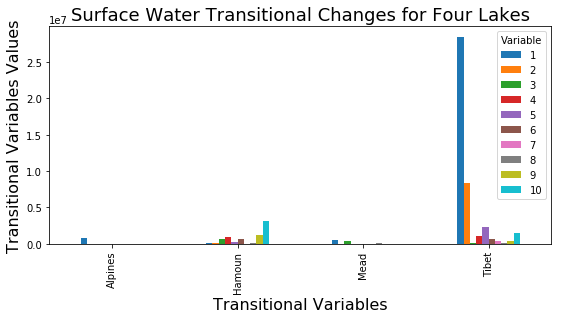

In [80]:
# Plot the data
count1.plot(kind='bar', figsize=(9,4))
plt.xlabel("Transitional Variables", fontsize=16)
plt.ylabel("Transitional Variables Values", fontsize=16)
plt.title("Surface Water Transitional Changes for Four Lakes", fontsize=18)
plt.show()

The graph above gives us a clearer view of how the Tibet's lakes have a greater area of study compared to the rest of the lakes, making difficult to visualize the rest of the data. 

Let's remove the Tibet's lakes in order to visualize the rest of the lakes. 

In [82]:
# Remove Tibet from the above dataset and graph it
count2 = count1.drop(index="Tibet", inplace=False)
count2

Variable,1,2,3,4,5,6,7,8,9,10
Area,,,,,,,,,,
Alpines,843675,2841,635,8009,9539,5828,316,1953,126,2122
Hamoun,55550,101399,688231,932941,231244,603288,1061,102437,1206518,3078107
Mead,524044,99,354712,2983,573,16668,33,47012,113,3215


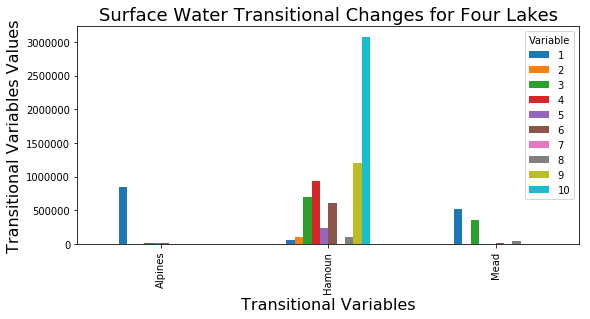

In [83]:
# Graph data without the Tibet's
count2.plot(kind='bar', figsize=(9,4))
plt.xlabel("Transitional Variables", fontsize=16)
plt.ylabel("Transitional Variables Values", fontsize=16)
plt.title("Surface Water Transitional Changes for Four Lakes", fontsize=18)
plt.show()

Hamoun has the second greatest area and it is clear how the data is driven by the different sample size of each lake which it can be an issue when comparing zones.

Let's take a look at the central tendency of the data.

In [77]:
# Empty lists for the stats
stat_min = [] # Minimum
stat_max = [] # Maximum
stat_ave = [] # Mean
stat_med = [] # Median
stat_P25 = [] # 25 percent quantile
stat_P75 = [] # 75 percent quantile
stat_var = [] # Variance
stat_std = [] # Standard Deviation


# Calcualate and append value to lists
for i in subset_lakes:
    mn =i.min() # minimum
    stat_min.append(mn)
    mx = i.max() #maximum
    stat_max.append(mx)
    av = i.mean() #Average
    stat_ave.append(av)
    p25 = np.percentile(i, 25) #1st quantile
    stat_P25.append(p25)
    md = np.median(i)# median
    stat_med.append(md)
    p75 = np.percentile(i, 75) # 3rd quantile
    stat_P75.append(p75)
    va = i.var() # variance
    stat_var.append(va)
    st = i.std() # standard deviation
    stat_std.append(st)



In [58]:
# put all in one list
stat_all = [stat_min, stat_max, stat_ave, stat_P25, stat_P75, stat_med, stat_var, stat_std]


# Rename Column and Row headers
stat_summary = pd.DataFrame(data =stat_all,
            index = ['Minimum','Maximum','Mean','25th Quantile','Median',
                     '75th Quantile','Variance','Standard Deviation'],
            columns = ['LakesTibet', 'LakeHamoun', 'AlpineLakes','LakeMeaddata'])

stat_summary.round(3)

,LakesTibet,LakeHamoun,AlpineLakes,LakeMeaddata
Minimum,1.000,1.000,1.000,1.000
Maximum,10.000,10.000,10.000,10.000
Mean,2.018,7.613,1.150,2.225
25th Quantile,1.000,4.000,1.000,1.000
Median,2.000,10.000,1.000,3.000
75th Quantile,1.000,9.000,1.000,1.000
Variance,4.433,7.924,0.735,3.180
Standard Deviation,2.105,2.815,0.857,1.783


Sample size affects the mean and standard deviation as seen on the table above, these values are higher for the Tibet and Hamoun lake, the lakes with the biggest areas. 

A solution to this is to calculate and run the statistics on the percentage of each transitional change.

In [84]:
# Iterate through the data, calculate the percentage, and creat a data frame

tables = Tibet, Hamoun, Alpines, Mead
for df_name in tables:
    
    percent = []
    for var in ["Count"]:
        
        percentage = ((df_name[var].divide(df_name.Count.sum()))*100)
        percentage = (round(percentage, 2))
        percent.append(percentage)
        
        percent = pd.concat(percent, axis=1)
        df_name["Percent"] = percent
        
        Percent_table = pd.concat([Tibet, Hamoun, Alpines, Mead], ignore_index=True, sort=True)
              
Percent_table.head()




,Area,Count,Percent,Variable
0,Tibet,28504243,65.54,1
1,Tibet,8373159,19.25,2
2,Tibet,95156,0.22,3
3,Tibet,1114056,2.56,4
4,Tibet,2375523,5.46,5


In [71]:
Percent1 = Percent_table.pivot(index='Area', columns='Variable', values='Percent')
Percent1


Variable,1,2,3,4,5,6,7,8,9,10
Area,,,,,,,,,,
Alpines,96.42,0.32,0.07,0.92,1.09,0.67,0.04,0.22,0.01,0.24
Hamoun,0.79,1.45,9.83,13.33,3.30,8.62,0.02,1.46,17.23,43.97
Mead,55.19,0.01,37.36,0.31,0.06,1.76,0.00,4.95,0.01,0.34
Tibet,65.54,19.25,0.22,2.56,5.46,1.52,0.75,0.38,0.99,3.33


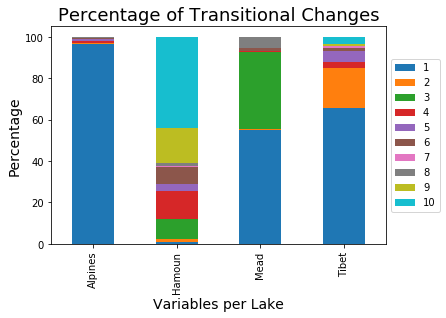

In [85]:
# Plot the percentage of each transitional value for each lake
Percent1.plot(kind='bar', stacked=True)
plt.xlabel("Variables per Lake", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.title("Percentage of Transitional Changes", fontsize=18)
plt.legend(("1", "2", "3","4", "5","6","7","8","9","10"), loc="center left", bbox_to_anchor=(1.0,0.5))

plt.show()


In [86]:
# Reverse the previous data to get a second insight into the same data
Percent2 = pd.DataFrame(Percent1).T
Percent2

Area,Alpines,Hamoun,Mead,Tibet
Variable,,,,
1,96.42,0.79,55.19,65.54
2,0.32,1.45,0.01,19.25
3,0.07,9.83,37.36,0.22
4,0.92,13.33,0.31,2.56
5,1.09,3.30,0.06,5.46
6,0.67,8.62,1.76,1.52
7,0.04,0.02,0.00,0.75
8,0.22,1.46,4.95,0.38
9,0.01,17.23,0.01,0.99


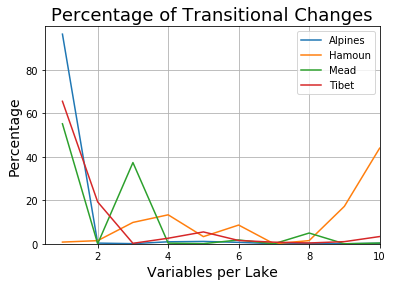

In [87]:
# Plot the data
Percent2 = pd.DataFrame(Percent1).T
Percent2.plot(kind='line', grid=True)
plt.xlim((0.5, 10))
plt.ylim((0, 100))
plt.xlabel("Variables per Lake", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.yticks(np.arange(0,100,20))
plt.title("Percentage of Transitional Changes", fontsize=18)
plt.legend(("Alpines","Hamoun","Mead","Tibet"))


plt.show()

The previous percentage graphs provide some interesting information about the change of the surface water for these four locations. The Alpine lakes, although having the smallest area, it had 96% of its permanent surface water unchanged, 55% percent for lake Mead, 65% for the Tibet and only 0.79% for Lake Hamoun. 

The second graph shows how the Alpine and Tibet's lakes have one sharp transitional change, value 1. Lake Mead shows two shar transitional values, 1 and 3, while lake Hamoun shows a more subtable change among all transitional values. 

Let's take a look at the central tendencies, dispersion and variation of the percentage data.

In [90]:
# Central tendencies of data above
Percent2.describe()

Area,Alpines,Hamoun,Mead,Tibet
count,10.000000,10.000000,10.00000,10.000000
mean,10.000000,10.000000,9.99900,10.000000
std,30.367224,13.310834,19.63478,20.323916
min,0.010000,0.020000,0.00000,0.220000
25%,0.107500,1.452500,0.02250,0.810000
50%,0.280000,5.960000,0.32500,2.040000
75%,0.857500,12.455000,4.15250,4.927500
max,96.420000,43.970000,55.19000,65.540000


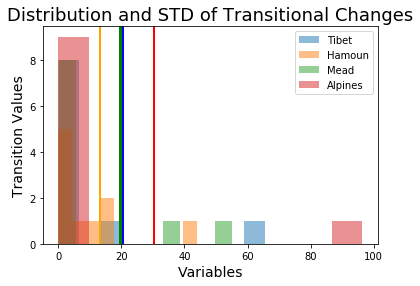

In [75]:
# Graph data and look at the variance
plt.hist(Percent2["Tibet"], alpha=0.5, label='Tibet')
plt.axvline(Percent2["Tibet"].std(),linestyle="solid", color="blue",  linewidth=3)
plt.hist(Percent2["Hamoun"], alpha=0.5, label='Hamoun')
plt.axvline(Percent2["Hamoun"].std(),linestyle="solid", color="orange", linewidth=2)
plt.hist(Percent2["Mead"], alpha=0.5, label='Mead') 
plt.axvline(Percent2["Mead"].std(),linestyle="solid", color="green", linewidth=3)
plt.hist(Percent2["Alpines"], alpha=0.5, label='Alpines')
plt.axvline(Percent2["Alpines"].std(),linestyle="solid", color="red", linewidth=2)


plt.xlabel("Variables", fontsize=14)
plt.ylabel("Transition Values", fontsize=14)
plt.title("Distribution and STD of Transitional Changes", fontsize=18)


plt.legend(loc='upper right') 
plt.show()



This graph of distribution and standard variation values (solid lines) seems to be offset due to the high number of pixels that fall into the number 1 category. Let's clean that category out to be able to visualize the distribution of the rest of the data. 

In [94]:
# Take value 1 off and plot the result
Percent3 = Percent2.drop(1, axis=0)
Percent3

Area,Alpines,Hamoun,Mead,Tibet
Variable,,,,
2,0.32,1.45,0.01,19.25
3,0.07,9.83,37.36,0.22
4,0.92,13.33,0.31,2.56
5,1.09,3.30,0.06,5.46
6,0.67,8.62,1.76,1.52
7,0.04,0.02,0.00,0.75
8,0.22,1.46,4.95,0.38
9,0.01,17.23,0.01,0.99
10,0.24,43.97,0.34,3.33


In [97]:
# describe the data above
Percent3.describe()

Area,Alpines,Hamoun,Mead,Tibet
count,9.000000,9.000000,9.000000,9.000000
mean,0.397778,11.023333,4.977778,3.828889
std,0.399117,13.694687,12.250412,6.022031
min,0.010000,0.020000,0.000000,0.220000
25%,0.070000,1.460000,0.010000,0.750000
50%,0.240000,8.620000,0.310000,1.520000
75%,0.670000,13.330000,1.760000,3.330000
max,1.090000,43.970000,37.360000,19.250000


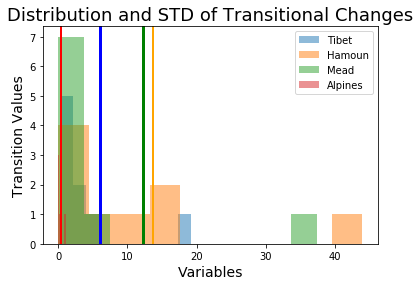

In [95]:
# Plot of the percentage data distribution and std, without the value 1 data
plt.hist(Percent3["Tibet"], alpha=0.5, label='Tibet')
plt.axvline(Percent3["Tibet"].std(),linestyle="solid", color="blue",  linewidth=3)
plt.hist(Percent3["Hamoun"], alpha=0.5, label='Hamoun')
plt.axvline(Percent3["Hamoun"].std(),linestyle="solid", color="orange", linewidth=2)
plt.hist(Percent3["Mead"], alpha=0.5, label='Mead') 
plt.axvline(Percent3["Mead"].std(),linestyle="solid", color="green", linewidth=3)
plt.hist(Percent3["Alpines"], alpha=0.5, label='Alpines')
plt.axvline(Percent3["Alpines"].std(),linestyle="solid", color="red", linewidth=2)


plt.xlabel("Variables", fontsize=14)
plt.ylabel("Transition Values", fontsize=14)
plt.title("Distribution and STD of Transitional Changes", fontsize=18)


plt.legend(loc='upper right') 
plt.show()

The graph bellow shows the distribution of the percentage data, the standard deviation values are shown as solid bars. 

<a id='Answers'></a>
## <center>Answers</center>

Note that the area for each transitional value could be easily converted into square meters. Each pixel has a 30m * 30m dimension, therefore, we can calculate the area by multiplying the count of pixels for each value by 900. 


<h4 style="font-family:times">1.Which AOI had the highest water gain?</h4>

It is as important to know where there is new water as it is to know where water has been resilient. Therefore, this answer might further break into two to account for the water that was never lost. To answer this questions, I will focus on four transitional values:

1 Unchanged permanent water<br>
4 Unchanged seasonal water

2 New permanent water<br>
5 New seasonal water

The Alpine's lakes had the highest percentage of unchanged permanent or seasonal water by adding up to 97.34, followed by the Tibet's water bodies with 68.1%, lake Mead with 55.50% and Hamoun with 14.12%.

For the appearance of new water, which indicates a conversation of land into permanent and seasonal water, the data showed the Tibet's lakes with the highest percentage of 24.71, followed by lake Hamoun with 4.75%, the Alpine's lakes with 1.41, and lake Mead with 0.07%. 

The Alpine Lakes are located between Italy and Switzerland, they are deep into the step glacial valleys making it a region of high river inflow, regular rainfall and limited access for water extraction. These environmental and topographical characteristics are responsible for the high presence of permanent surface water.  

The water bodies at the Tibetan Plateau, present the second highest percentage of unchanged permanent and seasonal water and the highest percentage of new permanent and seasonal water. However, the reason for such unchanging and changing data differs from that of the Alpine's lakes. The endorheic basin, at the Tibetan Plateau, has been expanding for the last 30 years due increasing of run-off and precipitation into the basin. This phenomenon is most likely linked to an increase of temperatures causing the snow and glaciers to melt.

Lake Mead, located east of Las Vegas, showed the third largest combined percentage on unchanged permanent and seasonal water. However, this position implies that the permanent water state of the lake is changing, this is linked to long droughts in the region and to a high water demand from this body of water. 

Lake Hamoun, located between Afghanistan and Iran showed the lowest percentage of combined unchanged permanent and seasonal surface water (14%) followed by a very low percentage of transition changes into permanent or seasonal water (4.75%). Lake Hamoun has been affected by drought and anthropogenic disturbances, most of its permanent water, from the once upon the time oasis, has transition into ephemeral water bodies (44%).

Unchanged permanent surface water and surface water that transitions into permanent water, might not always tell a story of success and resilience. Depending on the root of the cause and the region, a change from where once was only land, into water, might be showing signs of effects of climate change, environmental and/or anthropogenic disturbances. 


<h4 style="font-family:times">2.Which AOI had the highest loss of water?</h4>

To address this question, I will focus in the statistics of the following two values:

3 Permanent loss water
6 Permanent loss of seasonal water

The lost permanent water surfaces represent a conversion of permanent water into land as for the lost seasonal water. 

Lake Mead had the highest combined percentage for these two values, 39.12%, followed by lake Hamoun, the Tibetan lakes, and the Alpine's lakes. 18.45%, 1.74%, and 0.74%, respectively. 

As previously stated, Lake Mead and Hamoun have been exposed to drought and high demand of water for human related activities, most likely linked to the loss of water presented in the data. 


<h4 style="font-family:times">3.Which AOIs had the highest and lowest transitional variation?</h4>

To answer this question, lets refer back to the distribution and standard deviation values of the percentage data, making emphasis on the data where the value 1 was drop out of the dataset. 

As expected, the Alpine's lakes had the least variation (0.4), shown by the standard variation values, most likely due to that 96% of its values stayed as permanent water. Followed by the Tibet (6.02), lake Mead (12.25), and lake Hamoun (13.70). 

As previously mention, lake Hamoun has been affected by environmental and anthropogenic disturbance. Most of its water is observed as ephemeral surface water, meaning that small bodies of water form after precipitation and rapidly change or disappear due to demand or evaporation. This constant changes are most likely responsable for the high variability in transitional values for this particular region. 


<a id='WhatFurther'></a>
## <center>Proposed Further Research</center>

One of the takes away from exploring this dataset is that surface water around the world presents different behavior depending on its location, the environmental and anthropogenic factors that surround them. Datasets like the present allows to get an insight into an overall state of the surface water at respective areas of interest. However, it is important to note that this data does not tell the history of what happened in between and does not show what triggered the changes we observed. 

With this information on hand and taking advantage of the data made available by The European Commission's Joint Research Centre, I would further take this study and look at the time series of the areas of interest covered here and calculate water trends, aiming to pin point when within the last 32 year the transitional changes took place. 